In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names=["sepal_lenght", "sepal_width", "petal_lenght", "petal_width", "target"])

In [3]:
df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
feature = df.columns[0:4]

In [6]:
feature

Index(['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width'], dtype='object')

In [7]:
x = df.loc[:, feature].values

In [8]:
y = df.loc[:, ["target"]].values

In [9]:
ss = StandardScaler()

In [10]:
xx = ss.fit_transform(x)

(array([ 9., 23., 14., 27., 22., 20., 18.,  6.,  5.,  6.]),
 array([-1.87002413, -1.4338198 , -0.99761547, -0.56141113, -0.1252068 ,
         0.31099753,  0.74720187,  1.1834062 ,  1.61961053,  2.05581487,
         2.4920192 ]),
 <a list of 10 Patch objects>)

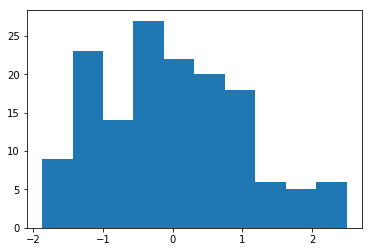

In [11]:
plt.hist(xx[:, 0])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pcs = PCA(n_components=2)

In [14]:
pca = pcs.fit_transform(xx)

In [15]:
pcs.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [16]:
pcs.explained_variance_ratio_.sum()*100

95.80097536148199

In [17]:
#pca

In [18]:
pca_df = pd.DataFrame(pca, columns=["pca_" + str(i) for i in range(2)])

In [19]:
pca_df.head()

,pca_0,pca_1
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [20]:
pca_df = pd.concat([pca_df, df[["target"]]], axis=1)

In [21]:
pca_df.shape

(150, 3)

In [22]:
pca_df.head()

,pca_0,pca_1,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


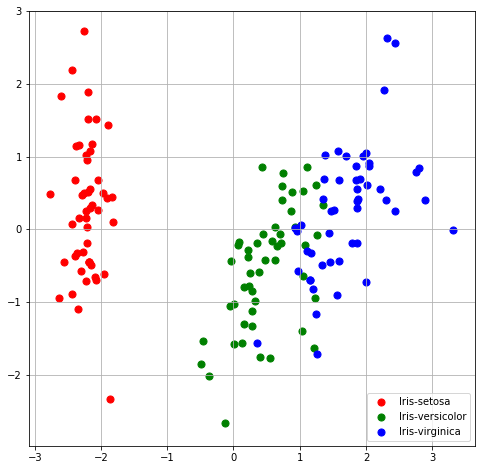

In [23]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1,1,1)

target = df.target.unique()
color = ['r', 'g', 'b']

for _target, _color in zip(target, color):
    indicesToKeep = pca_df["target"] == _target
    ax.scatter(pca_df.loc[indicesToKeep, "pca_0"],
              pca_df.loc[indicesToKeep, "pca_1"],
              color = _color,
              s=50)
ax.legend(target)
ax.grid()